Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [1]:
## Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.metrics import r2_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import Dataset
df=pd.read_csv(r'C:\Users\admin\Documents\Data Science\Assignment\Decision Trees\Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# 1. About Data Set

About the data:       

Let’s consider a Company dataset with around 10 variables and 400 records. 

The attributes are as follows: 

 Sales -- Unit sales (in thousands) at each location

 Competitor Price -- Price charged by competitor at each location

 Income -- Community income level (in thousands of dollars)

 Advertising -- Local advertising budget for company at each location (in thousands of dollars)

 Population -- Population size in region (in thousands)

 Price -- Price company charges for car seats at each site

 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

 Age -- Average age of the local population

 Education -- Education level at each location

 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location

 US -- A factor with levels No and Yes to indicate whether the store is in the US or not

# 2.Data Exploration

In [3]:
#Check for null Value:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

There is not any null value present in dataset.

In [4]:
#Check for the data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


As we can see from above target feature sale is of Flot Dtype, we want it in catagorical Dtype.

In [5]:
#check for shape
df.shape

(400, 11)

In [6]:
#Check for duplicated value
df.duplicated().sum()

0

In [7]:
#Descriptive Analysis
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


As we can see fro above decriptive stats the mean value of population is 264.84 and mean value of advertising is 6.635.  

we have to scale the features.

## Convert Sales Feature into the catagorical feature

In [8]:
#Descriptive stat for sales column
df.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

(array([ 6., 16., 47., 83., 89., 79., 40., 29.,  8.,  3.]),
 array([ 0.   ,  1.627,  3.254,  4.881,  6.508,  8.135,  9.762, 11.389,
        13.016, 14.643, 16.27 ]),
 <BarContainer object of 10 artists>)

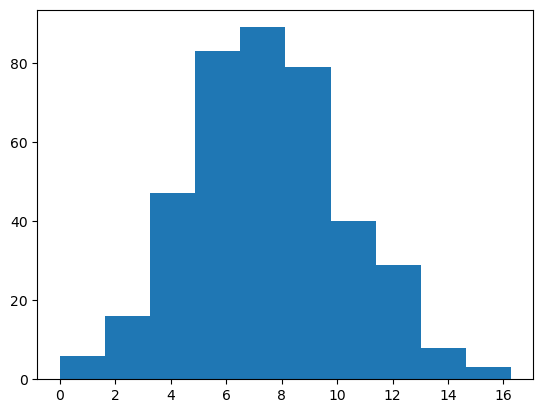

In [9]:
#Check for distribution of sales column
plt.hist(df.Sales)

As sales distribution is not skewed, and is normaly distributed.

so lets devide the sales value in three quartile less than first quartile is low, between second quantile is medium,and above third quantile is high 

In [10]:
df1=df.copy()
df1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [11]:
df1['Sales_Cat']=pd.cut(x=df1['Sales'], bins=[0,5.39,9.32,17],labels=['Low','Medium','High'],right=False)
df1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Cat
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Medium
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,Medium
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Medium


In [12]:
df1.Sales_Cat.dtype

CategoricalDtype(categories=['Low', 'Medium', 'High'], ordered=True)

In [13]:
df1.Sales_Cat.value_counts()

Medium    198
High      102
Low       100
Name: Sales_Cat, dtype: int64

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    object  
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    object  
 10  US           400 non-null    object  
 11  Sales_Cat    400 non-null    category
dtypes: category(1), float64(1), int64(7), object(3)
memory usage: 35.0+ KB


In [15]:
catagorical_features=df1.describe(include=['object','category']).columns
catagorical_features

Index(['ShelveLoc', 'Urban', 'US', 'Sales_Cat'], dtype='object')

In [16]:
df1[catagorical_features].head()

,ShelveLoc,Urban,US,Sales_Cat
0,Bad,Yes,Yes,High
1,Good,Yes,Yes,High
2,Medium,Yes,Yes,High
3,Medium,Yes,Yes,Medium
4,Bad,Yes,No,Low


In [17]:
numerical_features=df1.describe(include=['float64','int64']).columns
numerical_features

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education'],
      dtype='object')

In [18]:
df1[numerical_features].head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
0,9.50,138,73,11,276,120,42,17
1,11.22,111,48,16,260,83,65,10
2,10.06,113,35,10,269,80,59,12
3,7.40,117,100,4,466,97,55,14
4,4.15,141,64,3,340,128,38,13


# Visualization

<AxesSubplot:xlabel='ShelveLoc', ylabel='count'>

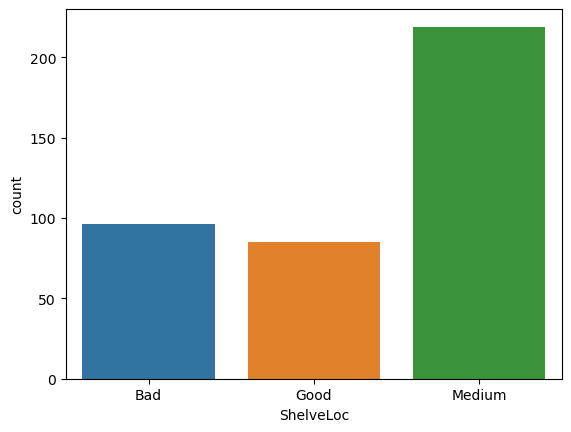

In [19]:
sns.countplot(x=df1['ShelveLoc'])

<AxesSubplot:xlabel='ShelveLoc', ylabel='count'>

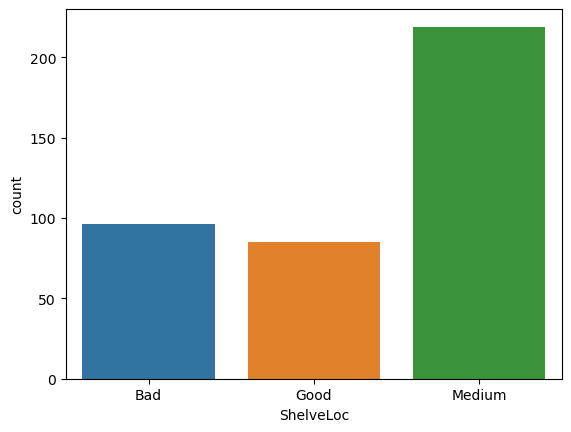

In [20]:
sns.countplot(x=df1['ShelveLoc'])

<AxesSubplot:xlabel='Urban', ylabel='count'>

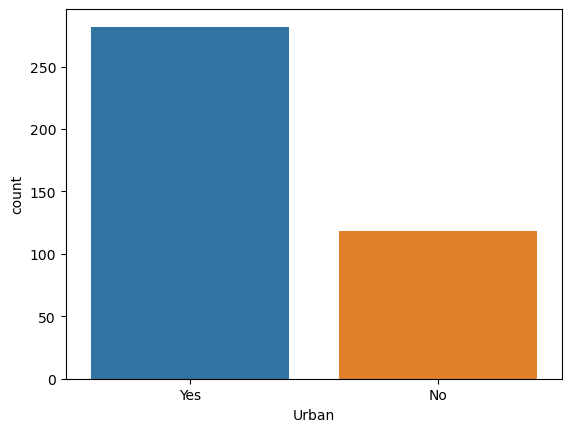

In [21]:
sns.countplot(x=df1['Urban'])

<AxesSubplot:xlabel='US', ylabel='count'>

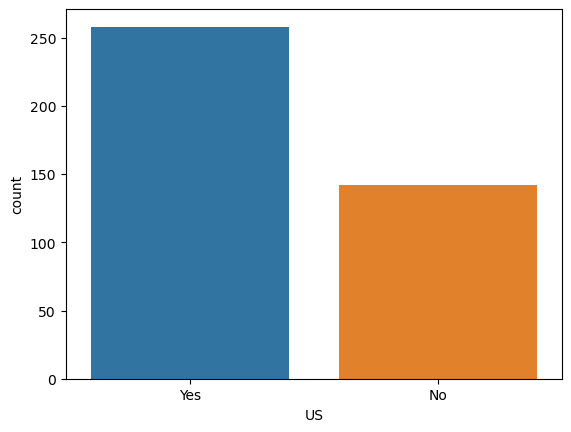

In [22]:
sns.countplot(x=df1['US'])

<AxesSubplot:xlabel='Sales_Cat', ylabel='count'>

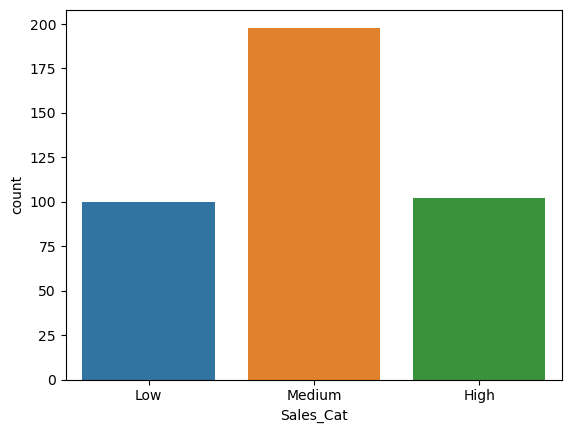

In [23]:
sns.countplot(x=df1['Sales_Cat'])

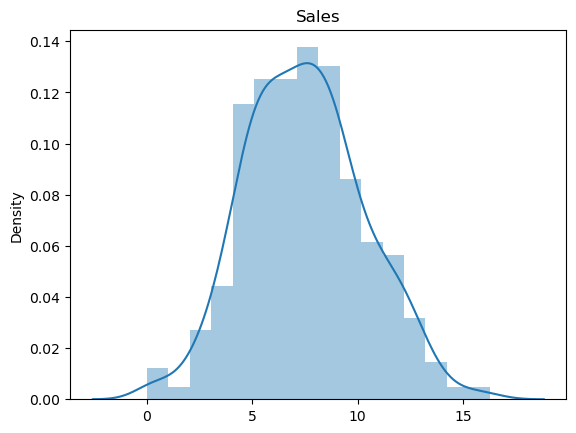

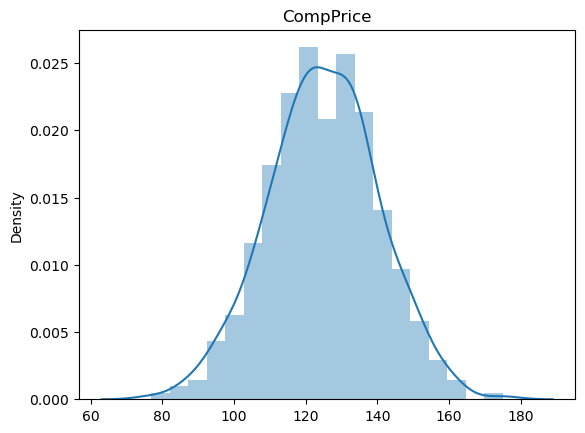

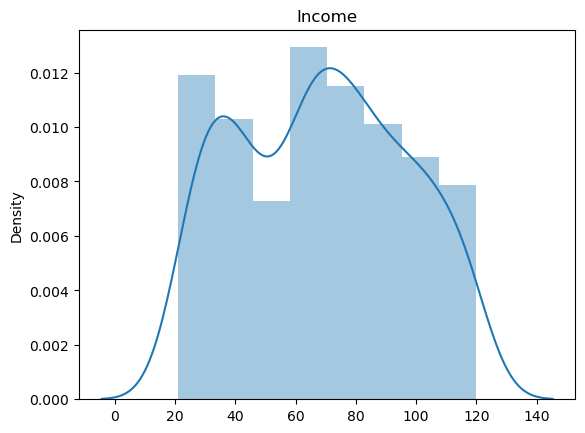

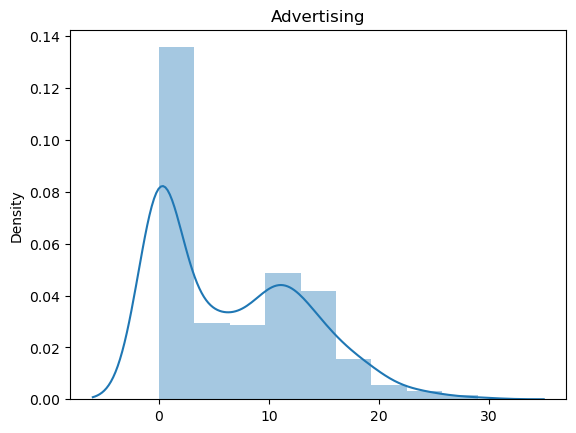

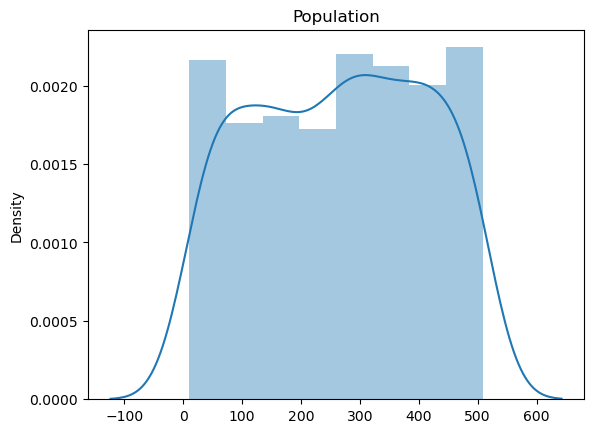

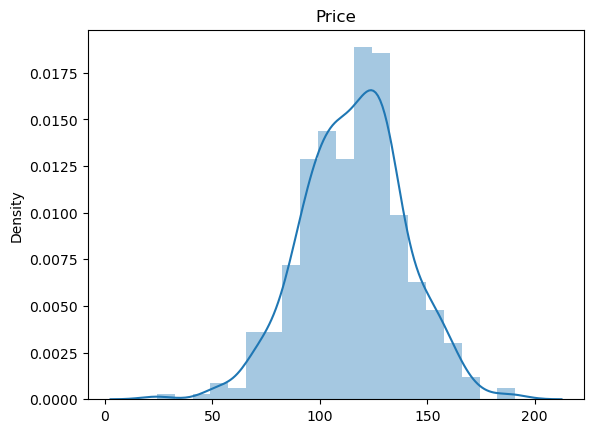

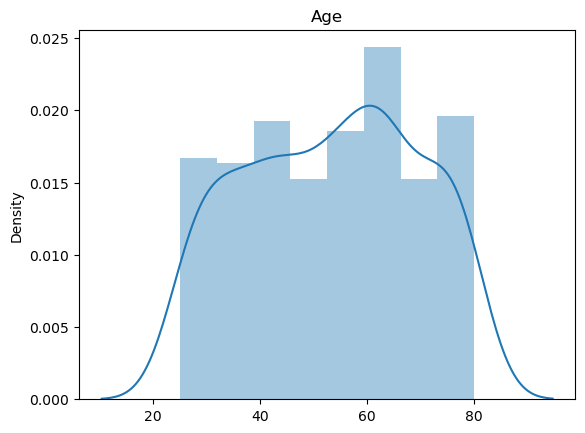

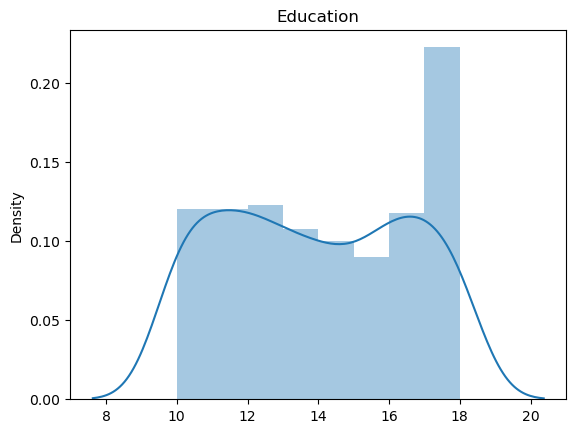

In [24]:
for feature in numerical_features:
    data=df1.copy()
    sns.distplot(x=data[feature])
    plt.title(feature)
    plt.show()

## Relation between catagorical feature and dependent variable(target column)

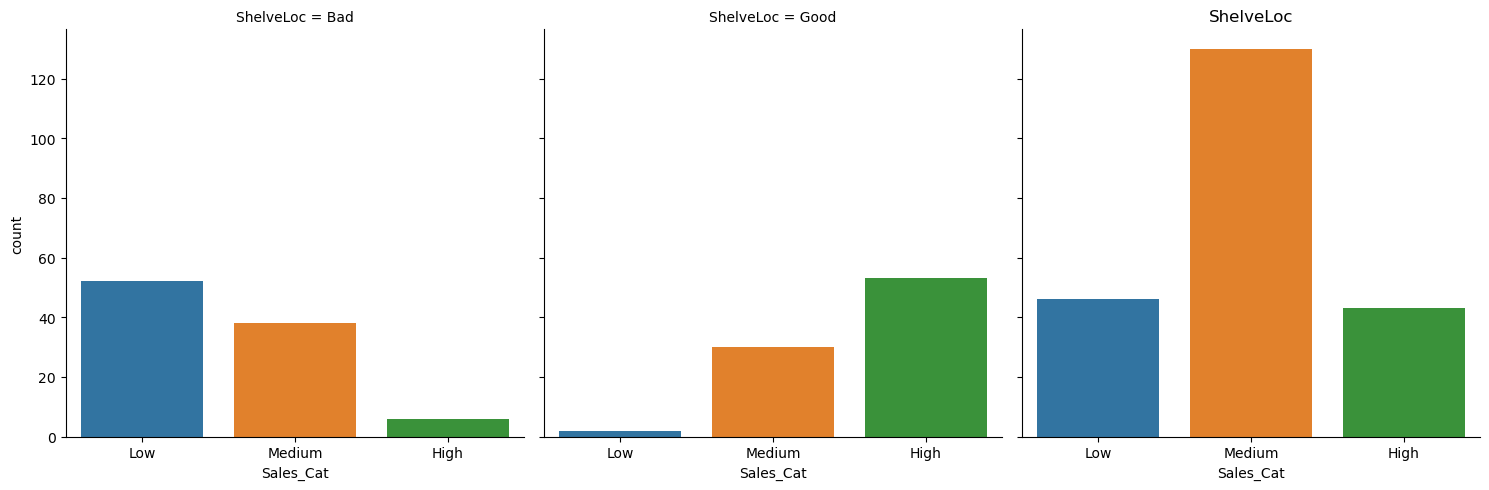

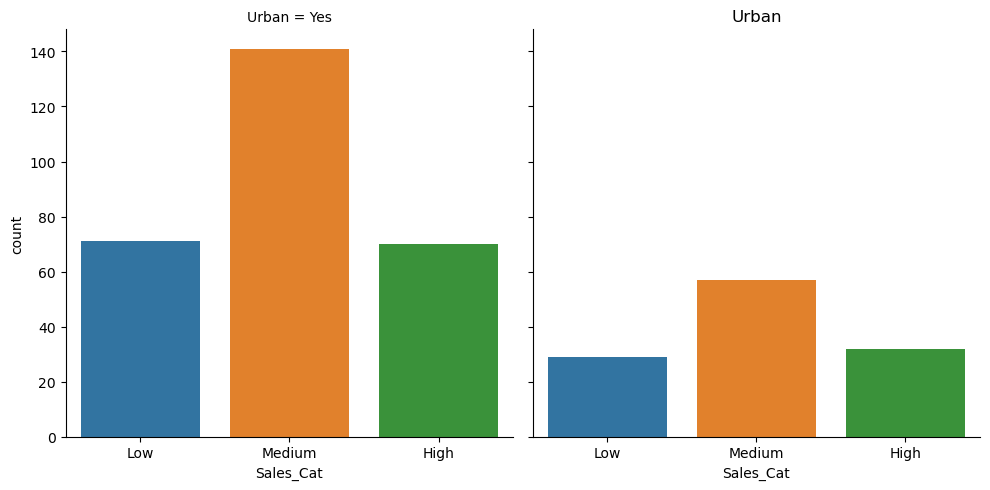

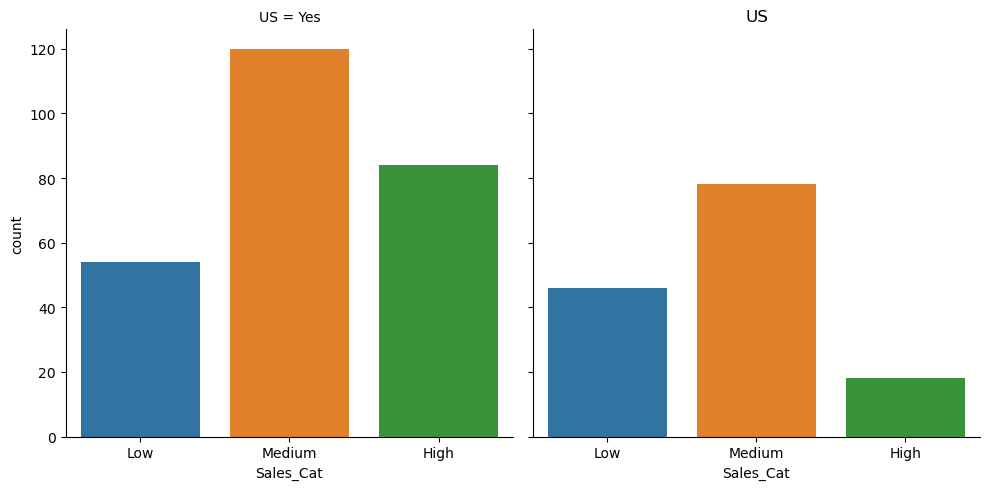

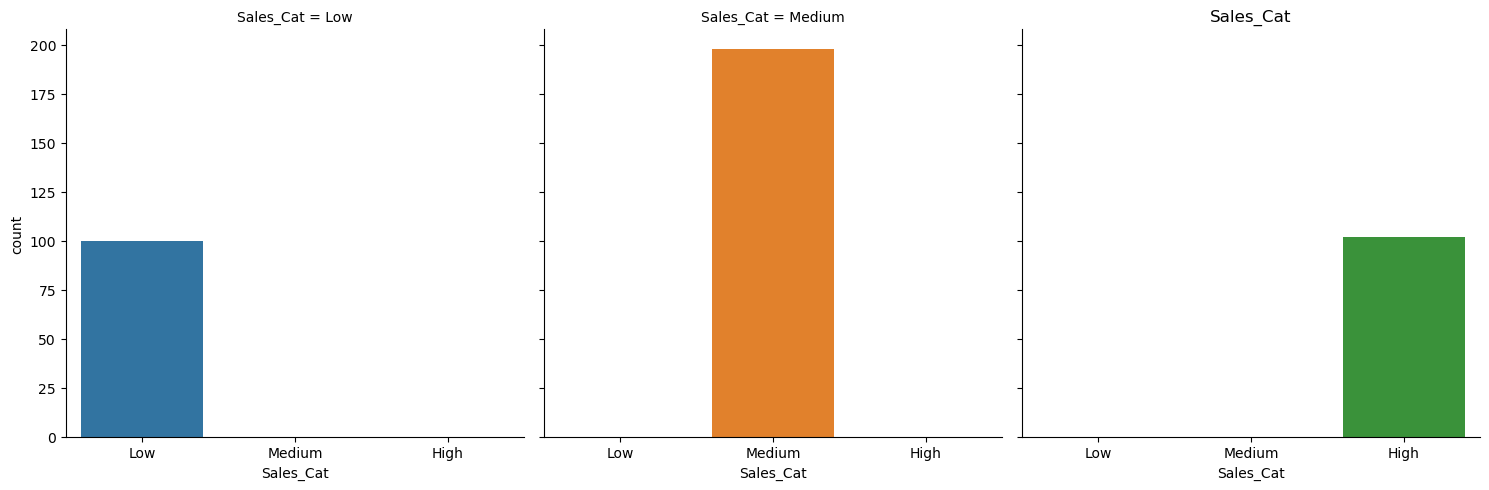

In [25]:
for feature in catagorical_features:
    data=df1.copy()
    sns.catplot(x='Sales_Cat', col=feature,kind='count', data=data)
    plt.title(feature)
    plt.show()

## Feature Engineering

- drop unwanted features
- Handle catagorical feature

In [26]:
df2=df1.copy()

In [27]:
df2.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Cat
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [28]:
df2.drop(columns=['Sales'],axis=1,inplace=True)

In [29]:
df2.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Cat
0,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [30]:
df2['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [31]:
def fn(x):
    df2[x]=df2[x].replace('Good',1)
    df2[x]=df2[x].replace('Medium',2)
    df2[x]=df2[x].replace('Bad',3)

In [32]:
fn('ShelveLoc')

In [33]:
df2['ShelveLoc'].value_counts()

2    219
3     96
1     85
Name: ShelveLoc, dtype: int64

In [34]:
df2['Urban'].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [35]:
def fn(y):
    df2[y]=df2[y].replace('Yes',1)
    df2[y]=df2[y].replace('No',2)

In [36]:
fn('Urban')
df2['Urban'].value_counts()

1    282
2    118
Name: Urban, dtype: int64

In [37]:
df2['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [38]:
fn('US')
df2['US'].value_counts()

1    258
2    142
Name: US, dtype: int64

In [39]:
df2.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Cat
0,138,73,11,276,120,3,42,17,1,1,High
1,111,48,16,260,83,1,65,10,1,1,High
2,113,35,10,269,80,2,59,12,1,1,High
3,117,100,4,466,97,2,55,14,1,1,Medium
4,141,64,3,340,128,3,38,13,1,2,Low


In [40]:
x=df2.drop('Sales_Cat',axis=1)
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,3,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,3,38,13,1,2
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,2,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,3,50,12,1,1


In [41]:
y=df2[['Sales_Cat']]
y

,Sales_Cat
0,High
1,High
2,High
3,Medium
4,Low
...,...
395,High
396,Medium
397,Medium
398,Medium


In [42]:
le=LabelEncoder()
y=le.fit_transform(y)
y

array([0, 0, 0, 2, 1, 0, 2, 0, 2, 1, 2, 0, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0,
       1, 2, 0, 0, 2, 1, 1, 2, 0, 2, 2, 2, 1, 0, 2, 1, 2, 1, 1, 2, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 2, 2, 1, 2, 0, 1, 2, 1, 2, 2, 1, 2, 2, 1,
       2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 1, 2, 2, 2, 0, 1, 1, 2, 2, 0,
       2, 2, 1, 1, 1, 2, 2, 2, 0, 2, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 1, 1, 2, 2,
       0, 2, 1, 2, 1, 2, 0, 0, 2, 2, 2, 1, 2, 2, 1, 0, 2, 0, 0, 0, 2, 2,
       2, 2, 2, 0, 0, 0, 1, 1, 1, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 2, 1, 2,
       2, 0, 0, 2, 1, 2, 1, 1, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 1, 1,
       1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 0, 0, 2, 1, 1, 2, 1, 0, 0,
       0, 2, 2, 1, 1, 2, 2, 2, 2, 0, 1, 2, 0, 2, 0, 2, 0, 0, 2, 1, 0, 0,
       1, 2, 2, 0, 2, 1, 1, 1, 2, 1, 2, 2, 0, 2, 1, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 1, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 0, 0, 1, 2, 1, 0, 0, 2,

In [51]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [44]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25, random_state=1)

In [45]:
dt=DecisionTreeClassifier(criterion='entropy')

In [46]:
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.57      0.67      0.62        18
           1       0.50      0.58      0.54        24
           2       0.71      0.62      0.66        58

    accuracy                           0.62       100
   macro avg       0.59      0.62      0.60       100
weighted avg       0.63      0.62      0.62       100



In [47]:
print('Training Accuracy:',dt.score(xtrain,ytrain))
print('Testing Accuracy:',dt.score(xtest,ytest))

Training Accuracy: 1.0
Testing Accuracy: 0.62


#### - Model is overfitted. As testing accurancy is high and traing accurancy is very low

## Hyperparameter Tuning

In [81]:
params={
    'criterion': ['entropy','gini'],
    'splitter': ['best','random'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
}

In [82]:
grid=GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params,verbose=2)

In [83]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ......criterion=entropy, max_depth=1, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=1, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=1, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=1, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=1, splitter=best; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=1, splitter=random; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=1, splitter=random; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=1, splitter=random; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=1, splitter=random; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=1, splitter=random; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=2, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=2, 

[CV] END .....criterion=entropy, max_depth=12, splitter=best; total time=   0.0s
[CV] END .....criterion=entropy, max_depth=12, splitter=best; total time=   0.0s
[CV] END .....criterion=entropy, max_depth=12, splitter=best; total time=   0.0s
[CV] END .....criterion=entropy, max_depth=12, splitter=best; total time=   0.0s
[CV] END ...criterion=entropy, max_depth=12, splitter=random; total time=   0.0s
[CV] END ...criterion=entropy, max_depth=12, splitter=random; total time=   0.0s
[CV] END ...criterion=entropy, max_depth=12, splitter=random; total time=   0.0s
[CV] END ...criterion=entropy, max_depth=12, splitter=random; total time=   0.0s
[CV] END ...criterion=entropy, max_depth=12, splitter=random; total time=   0.0s
[CV] END .....criterion=entropy, max_depth=13, splitter=best; total time=   0.0s
[CV] END .....criterion=entropy, max_depth=13, splitter=best; total time=   0.0s
[CV] END .....criterion=entropy, max_depth=13, splitter=best; total time=   0.0s
[CV] END .....criterion=entr

[CV] END .......criterion=gini, max_depth=8, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=8, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=8, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=8, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=8, splitter=random; total time=   0.0s
[CV] END .........criterion=gini, max_depth=9, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=9, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=9, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=9, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=9, splitter=best; total time=   0.0s
[CV] END .......criterion=gini, max_depth=9, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=9, splitter=random; total time=   0.0s
[CV] END .......criterion=gi

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15],
                         'splitter': ['best', 'random']},
             verbose=2)

In [84]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3, 'splitter': 'random'}

In [85]:
model=DecisionTreeClassifier(criterion='gini',max_depth=3,splitter='random')
model.fit(xtrain,ytrain)
ypred_=model.predict(xtrain)

In [86]:
print('Training accuracy:' ,model.score(xtrain,ytrain))
print('Testing accuracy:' ,model.score(xtest,ytest))

Training accuracy: 0.6366666666666667
Testing accuracy: 0.57


In [87]:
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 250

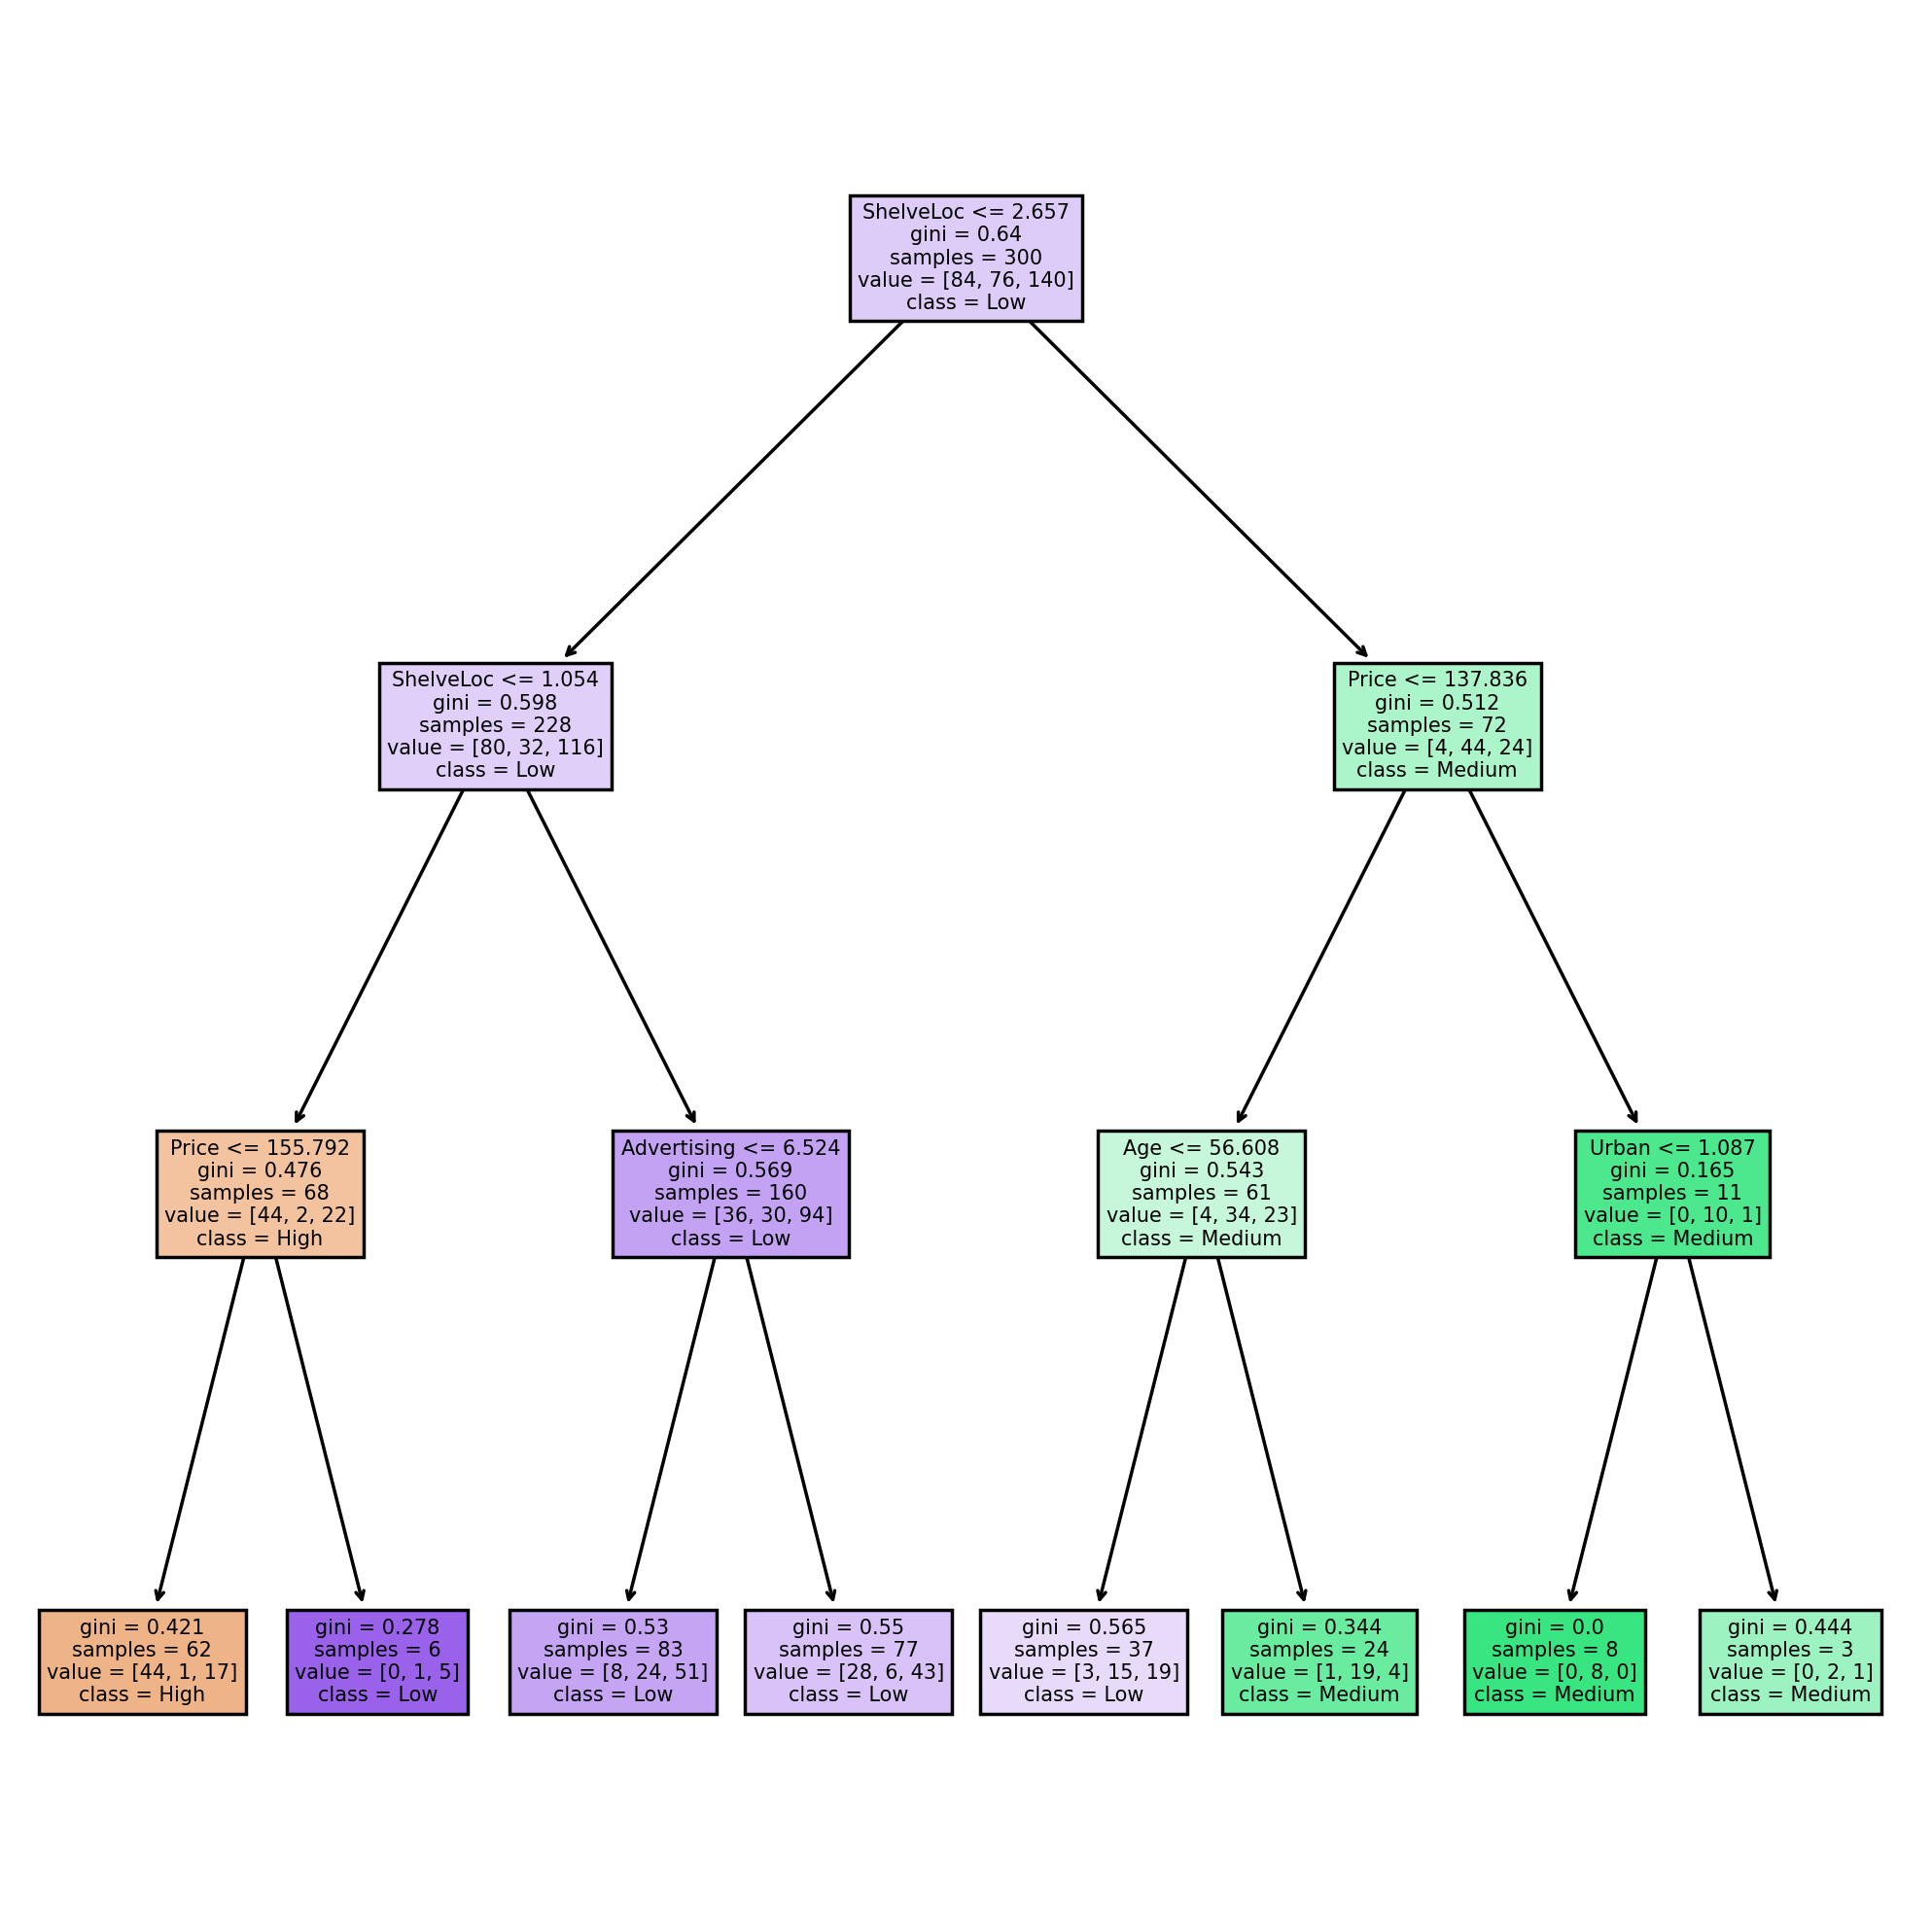

In [89]:
tree.plot_tree(model, feature_names=x.columns, 
               class_names=df2['Sales_Cat'].unique(),
              filled=True)
plt.show()

In [90]:
dt.feature_importances_

array([0.1284357 , 0.09857801, 0.07956804, 0.06127867, 0.21534986,
       0.16804448, 0.11874527, 0.07708736, 0.01805655, 0.03485607])

In [91]:
fi = pd.DataFrame({'feature': list(xtrain.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [92]:
fi

,feature,importance
5,ShelveLoc,0.667569
4,Price,0.138270
2,Advertising,0.100564
6,Age,0.083354
8,Urban,0.010242
0,CompPrice,0.000000
1,Income,0.000000
3,Population,0.000000
7,Education,0.000000
9,US,0.000000
